In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
%matplotlib inline

In [2]:
train = pd.read_csv(r"data\train\train.csv")
test = pd.read_csv(r"data\test\test.csv")

In [5]:
train.head()

,id,text,author
0,id00001,Idris was well content with this resolve of mine.,MWS
1,id00002,"I was faint, even fainter than the hateful mod...",HPL
2,id00003,"Above all, I burn to know the incidents of you...",EAP
3,id00004,"He might see, perhaps, one or two points with ...",EAP
4,id00005,All obeyed the Lord Protector of dying England...,MWS


In [6]:
test.head()

,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...


In [7]:
train.apply(lambda x: sum(x.isnull()),axis=0)

id        0
text      0
author    0
dtype: int64

In [8]:
train['author'].value_counts()

EAP    7900
MWS    6044
HPL    5635
Name: author, dtype: int64

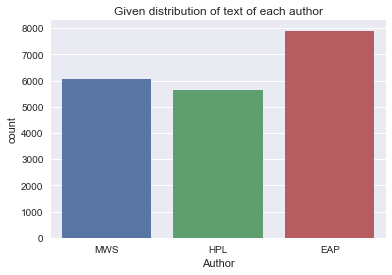

In [9]:
plt.figure()
sns.countplot(train['author'],)
plt.xlabel('Author')
plt.title('Given distribution of text of each author')
plt.show()

In [19]:
## Number of words in the text 
train["num_words"] = train["text"].apply(lambda x: len(str(x).split()))
test["num_words"] = test["text"].apply(lambda x: len(str(x).split()))


In [20]:
## Number of unique words in the text 
train["num_unique_words"] = train["text"].apply(lambda x: len(set(str(x).split())))
test["num_unique_words"] = test["text"].apply(lambda x: len(set(str(x).split())))


In [21]:
## Number of characters in the text 
train["num_chars"] = train["text"].apply(lambda x: len(str(x)))
test["num_chars"] = test["text"].apply(lambda x: len(str(x)))


In [66]:
# Number of sentences
train['num_sentences'] = train["text"].apply(lambda x: len(nltk.sent_tokenize(x)))
test['num_sentences'] = test["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [67]:
# Length of text
train['text_len'] = train["text"].apply(lambda x: len(x))
test['text_len'] = test["text"].apply(lambda x: len(x))

In [23]:
## Number of Punctuations in the text 
import string
train["num_punctuations"] =train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
test["num_punctuations"] =test['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

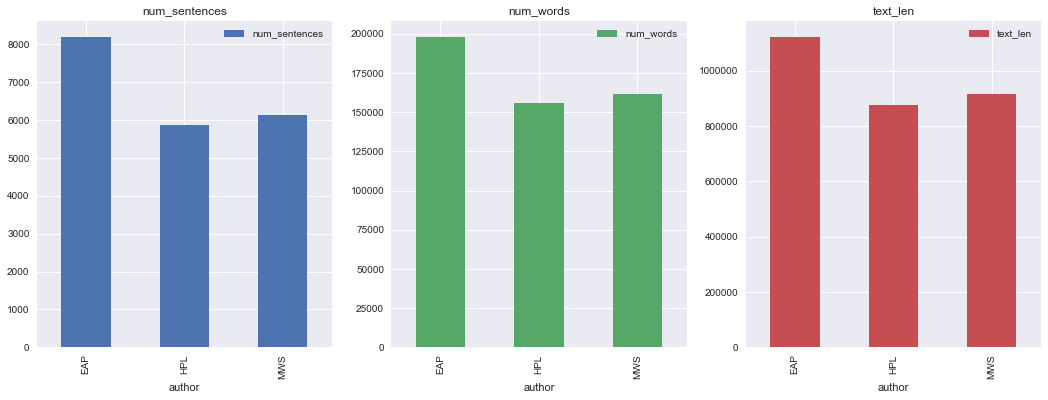

In [68]:
# first group by author
(train.groupby('author')
 # select the columns we are interested in (note the list inside the []-operator)
 [['num_sentences','num_words','text_len']]
 # we calculate the sum for each column within each author group
 .sum()
 # finally, plot as bar chart in different figures
 .plot.bar(subplots = True, layout = (1,3), figsize = (18,6)));

C:\Users\ME\NEU\Anaconda\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


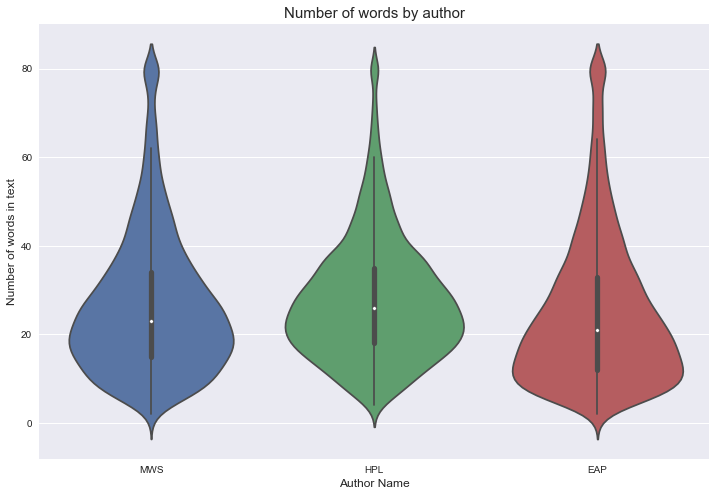

In [24]:
train['num_words'].loc[train['num_words']>80] = 80 #truncation for better visuals
plt.figure(figsize=(12,8))
sns.violinplot(x='author', y='num_words', data=train)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of words in text', fontsize=12)
plt.title("Number of words by author", fontsize=15)
plt.show()

C:\Users\ME\NEU\Anaconda\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


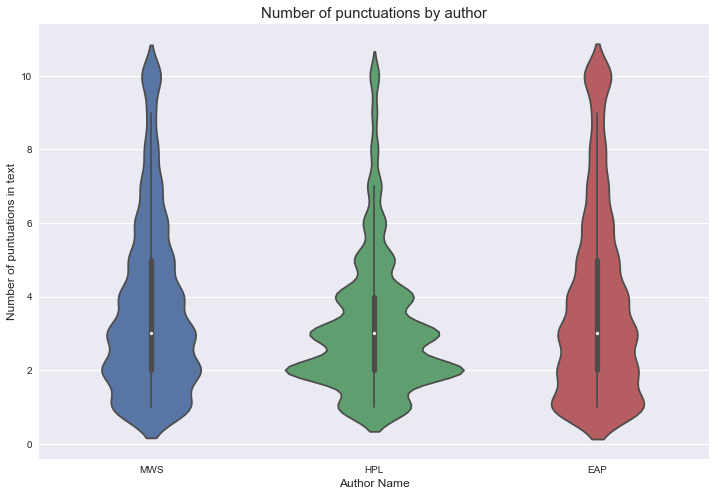

In [25]:
train['num_punctuations'].loc[train['num_punctuations']>10] = 10 #truncation for better visuals
plt.figure(figsize=(12,8))
sns.violinplot(x='author', y='num_punctuations', data=train)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of puntuations in text', fontsize=12)
plt.title("Number of punctuations by author", fontsize=15)
plt.show()

C:\Users\ME\NEU\Anaconda\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


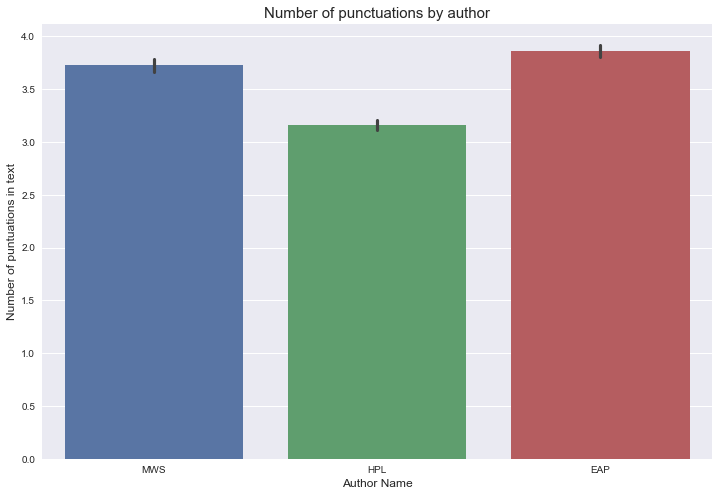

In [26]:
train['num_punctuations'].loc[train['num_punctuations']>10] = 10 #truncation for better visuals
plt.figure(figsize=(12,8))
sns.barplot(x='author', y='num_punctuations', data=train)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of puntuations in text', fontsize=12)
plt.title("Number of punctuations by author", fontsize=15)
plt.show()

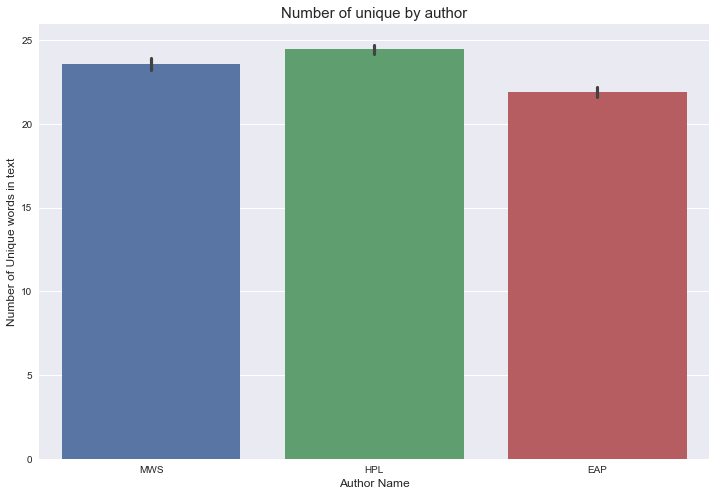

In [27]:
plt.figure(figsize=(12,8))
sns.barplot(x='author', y='num_unique_words', data=train)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of Unique words in text', fontsize=12)
plt.title("Number of unique by author", fontsize=15)
plt.show()

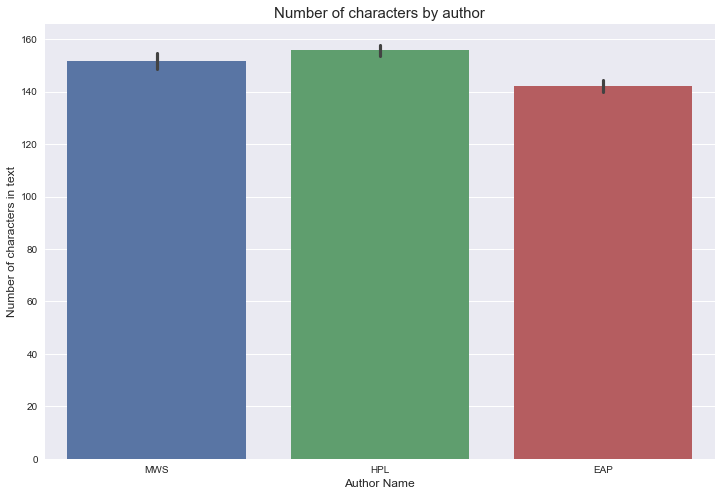

In [34]:
plt.figure(figsize=(12,8))
sns.barplot(x='author', y='num_chars', data=train)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of characters in text', fontsize=12)
plt.title("Number of characters by author", fontsize=15)
plt.show()

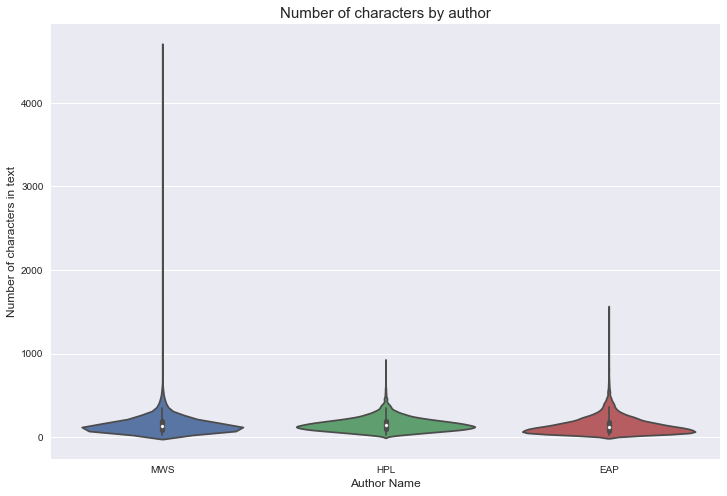

In [35]:

plt.figure(figsize=(12,8))
sns.violinplot(x='author', y='num_chars', data=train)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of characters in text', fontsize=12)
plt.title("Number of characters by author", fontsize=15)
plt.show()

In [38]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ME\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ME\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [41]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))
lemm = WordNetLemmatizer()

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    words = [lemm.lemmatize(w) for w in words] #4
    return words

In [42]:
eap = preprocessing(train[train.author=="EAP"]["text"])

In [43]:
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline 

In [57]:
plt.figure(figsize=(200,100))
wc = WordCloud(background_color="black", max_words=100, 
                stopwords=STOPWORDS, max_font_size= 40)
wc.generate(" ".join(eap))

plt.title("Edgar Allan Poe", fontsize=500)
plt.imshow(wc,alpha=0.90)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

In [46]:
hpl = preprocessing(train[train.author=="HPL"]["text"])


In [56]:
plt.figure(figsize=(200,100))
wc = WordCloud(background_color="black", max_words=100, 
                stopwords=STOPWORDS, max_font_size= 40)
wc.generate(" ".join(hpl))
plt.title("H. P. Lovecraft", fontsize=500)
plt.imshow(wc,alpha=0.90)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

In [49]:
mws = preprocessing(train[train.author=="MWS"]["text"])

In [64]:
plt.figure(figsize=(200,100))
wc = WordCloud(background_color="black", max_words=100, 
                stopwords=STOPWORDS, max_font_size= 40)
wc.generate(" ".join(mws))
plt.title("Mary Wollstonecraft Shelley", fontsize=500)
plt.imshow(wc,alpha=0.90)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

In [58]:
from nltk.util import ngrams
from collections import Counter

In [59]:
## Functions to get the grams
def get_ngrams(text, n):
    n_grams = ngrams((text), n)
    return [ ' '.join(grams) for grams in n_grams]

def gramfreq(text,n,num):
    # Extracting bigrams
    result = get_ngrams(text,n)
    # Counting bigrams
    result_count = Counter(result)
    # Converting to the result to a data frame
    df = pd.DataFrame.from_dict(result_count, orient='index')
    df = df.rename(columns={'index':'words', 0:'frequency'}) # Renaming index column name
    return df.sort_values(["frequency"],ascending=[0])[:num]

def gram_table(x, gram, length):
    out = pd.DataFrame(index=None)
    for i in gram:
        table = pd.DataFrame(gramfreq(preprocessing(train[train.author == x]['text']),i,length).reset_index())
        table.columns = ["{}-Gram".format(i),"Occurence"]
        out = pd.concat([out, table], axis=1)
    return out

In [60]:
gram_table(x="EAP", gram=[1,2,3,4], length=20)

,1-Gram,Occurence,2-Gram,Occurence,3-Gram,Occurence,4-Gram,Occurence
0,upon,1025,let u,50,madame l espanaye,12,general john b c,12
1,one,671,three four,23,general john b,12,brigadier general john b,7
2,could,453,l etoile,23,john b c,12,ugh ugh ugh ugh,6
3,would,409,one two,23,ha ha ha,11,brevet brigadier general john,6
4,said,356,every thing,22,barrière du roule,10,john b c smith,6
5,say,314,ha ha,22,ugh ugh ugh,8,angle forty five degree,5
6,time,314,main compartment,21,brigadier general john,7,detecting bringing practice nice,4
7,little,275,old man,21,de l omelette,7,doctor dubble l dee,4
8,well,266,said dupin,21,forty five degree,7,mille mille mille mille,4
9,eye,266,madame lalande,20,mille mille mille,7,thrown water immediately death,4


In [61]:
gram_table(x="HPL", gram=[1,2,3,4], length=20)

,1-Gram,Occurence,2-Gram,Occurence,3-Gram,Occurence,4-Gram,Occurence
0,one,516,old man,59,heh heh heh,9,eric moreland clapham lee,4
1,could,480,could see,31,terrible old man,9,oonai city lute dancing,4
2,thing,433,one night,23,charles le sorcier,8,aira city marble beryl,4
3,old,392,old woman,22,small paned window,8,mad arab abdul alhazred,4
4,would,357,one might,19,great great great,6,necronomicon mad arab abdul,4
5,man,280,one could,18,city marble beryl,5,village plain edge bog,3
6,time,279,shunned house,17,cap n obed,5,sir eric moreland clapham,3
7,like,273,next day,17,great old one,4,nithra fall tiny kra,3
8,seemed,272,heh heh,17,new church green,4,heh heh heh heh,3
9,night,260,could tell,16,thraa ilarnek kadatheron,4,region sea meet sky,3


In [62]:
gram_table(x="MWS", gram=[1,2,3,4], length=20)

,1-Gram,Occurence,2-Gram,Occurence,3-Gram,Occurence,4-Gram,Occurence
0,one,489,old man,29,let u go,4,next day next hour,2
1,would,475,lord raymond,28,whole human race,3,nearest town took post,2
2,could,383,fellow creature,23,became every day,3,abode near hyde park,2
3,life,350,one day,21,time lord raymond,3,five year old mother,2
4,yet,318,let u,16,might one day,3,like thousand pack wolf,2
5,day,288,native country,16,hundred thousand year,3,one day may claim,2
6,heart,284,day night,15,month elapsed since,3,day may claim hand,2
7,eye,284,every day,15,first rank among,3,accused caused death brother,2
8,love,282,taken place,14,change taken place,3,nothing painful human mind,2
9,time,276,two year,12,nearly two year,3,castle found repose love,1
